In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = load_iris(as_frame=True)
df = pd.DataFrame(data.data)
df['Target'] = data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Model Evaluation and training

In [30]:
def evaluate(criterion="gini", splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1,max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0):
    X = df.iloc[:,:-1]
    y = df['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    dtree = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_leaf=min_samples_leaf, min_samples_split= min_samples_split, max_features=max_features,max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease)
    dtree.fit(X_train,y_train)
    pred_y = dtree.predict(X_test)
    
    print(classification_report(pred_y,y_test))
    print("\n")
    print(confusion_matrix(pred_y, y_test))

    fig, axes = plt.subplots(figsize=(12,12))
    plot_tree(dtree, ax=axes)
    plt.show()

    return fig
    
    

In [12]:
X = df.iloc[:,:-1]
y = df['Target']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [14]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
pred_y = dtree.predict(X_test)

In [19]:
print(classification_report(pred_y, y_test))
print("\n")
print(confusion_matrix(pred_y, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


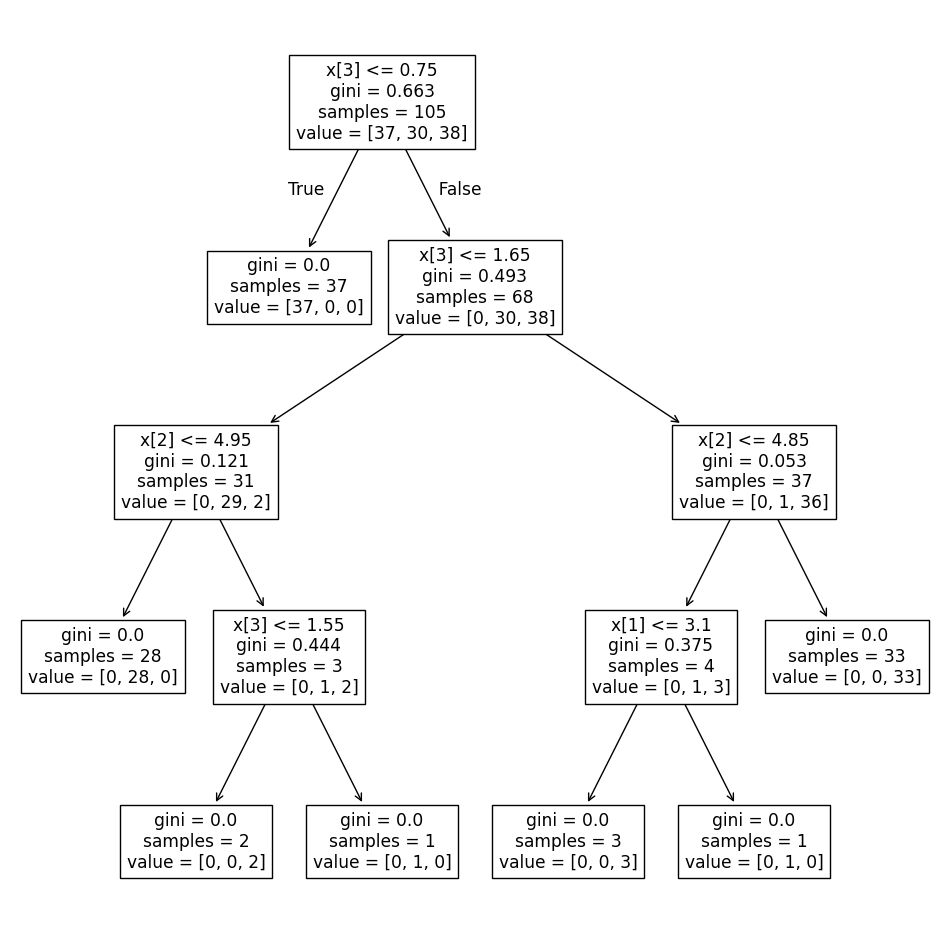

In [22]:
fig, axe = plt.subplots(figsize=(12,12))
plot_tree(dtree,ax=axe)
plt.show()

## Hyperparameter Tuning

### 1. Criterion

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


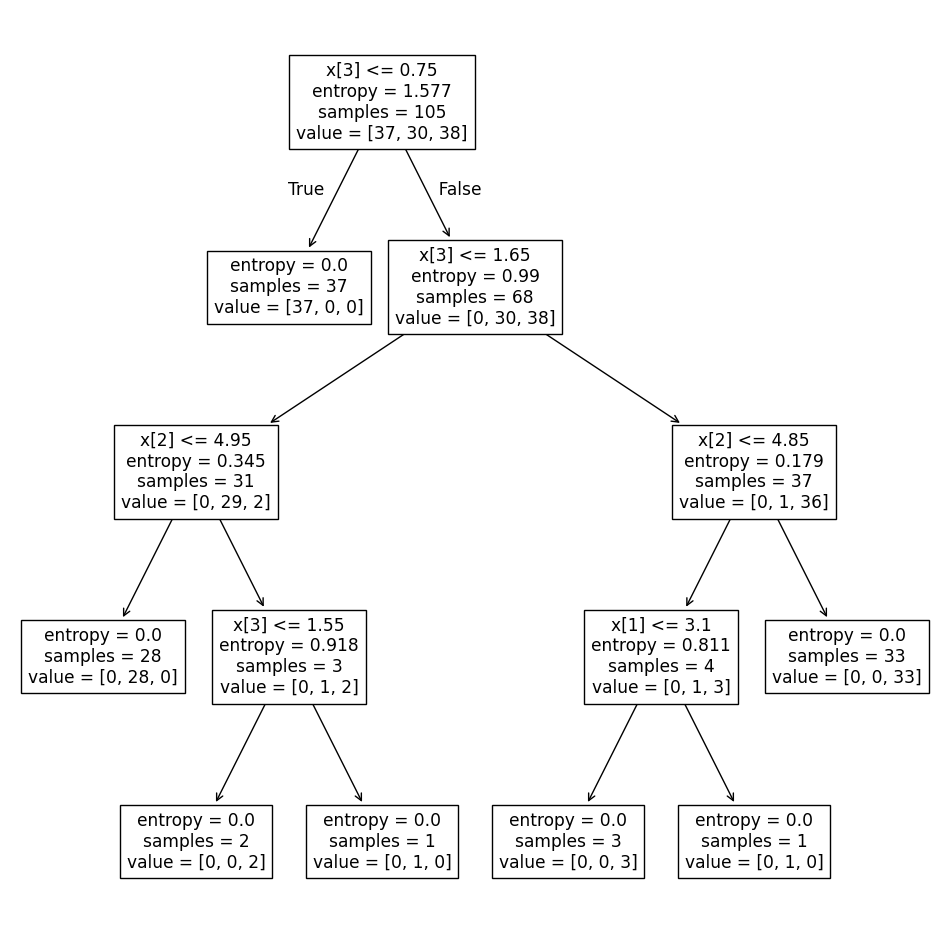

In [31]:
fig_entropy = evaluate(criterion="entropy")

### 2. Splitter

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.95      0.86      0.90        22
           2       0.83      0.91      0.87        11

    accuracy                           0.91        45
   macro avg       0.90      0.92      0.91        45
weighted avg       0.91      0.91      0.91        45



[[12  0  0]
 [ 1 19  2]
 [ 0  1 10]]


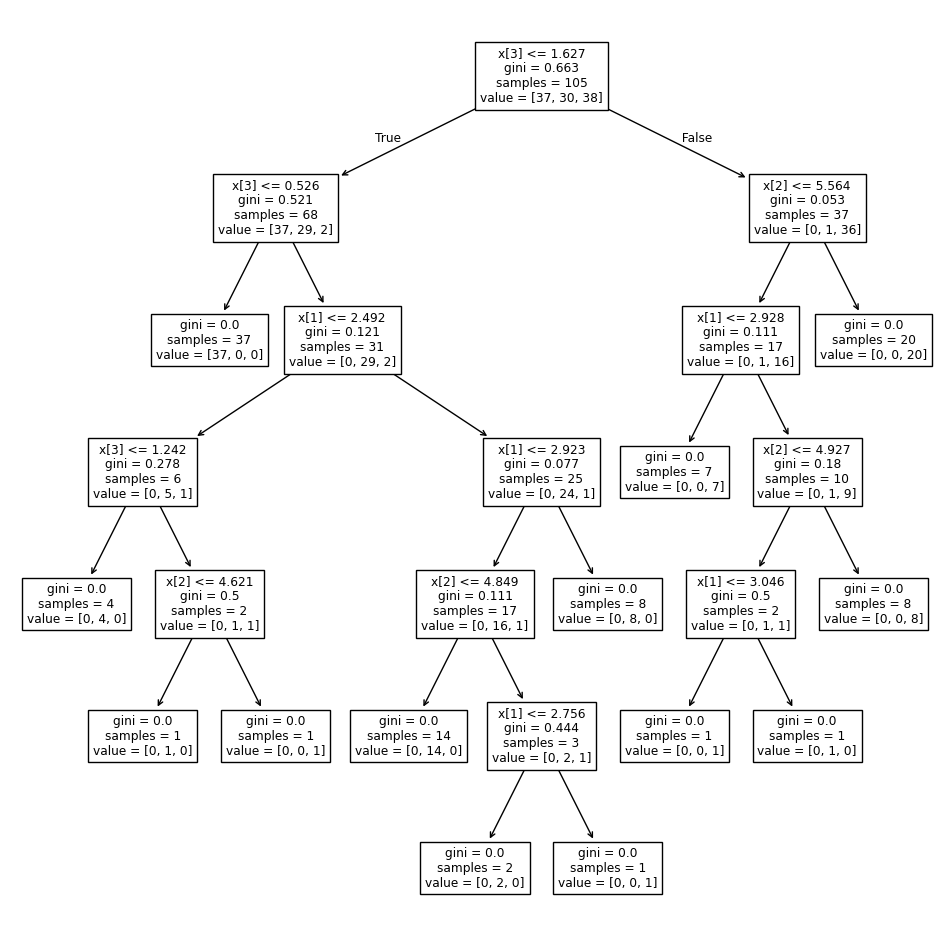

In [52]:
fig_splitter_random = evaluate(splitter="random")
fig_splitter_random.savefig("Fig_Splitter_Random.png")

### 3. Max_Depth

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



[[13  0  0]
 [ 0 19  0]
 [ 0  1 12]]


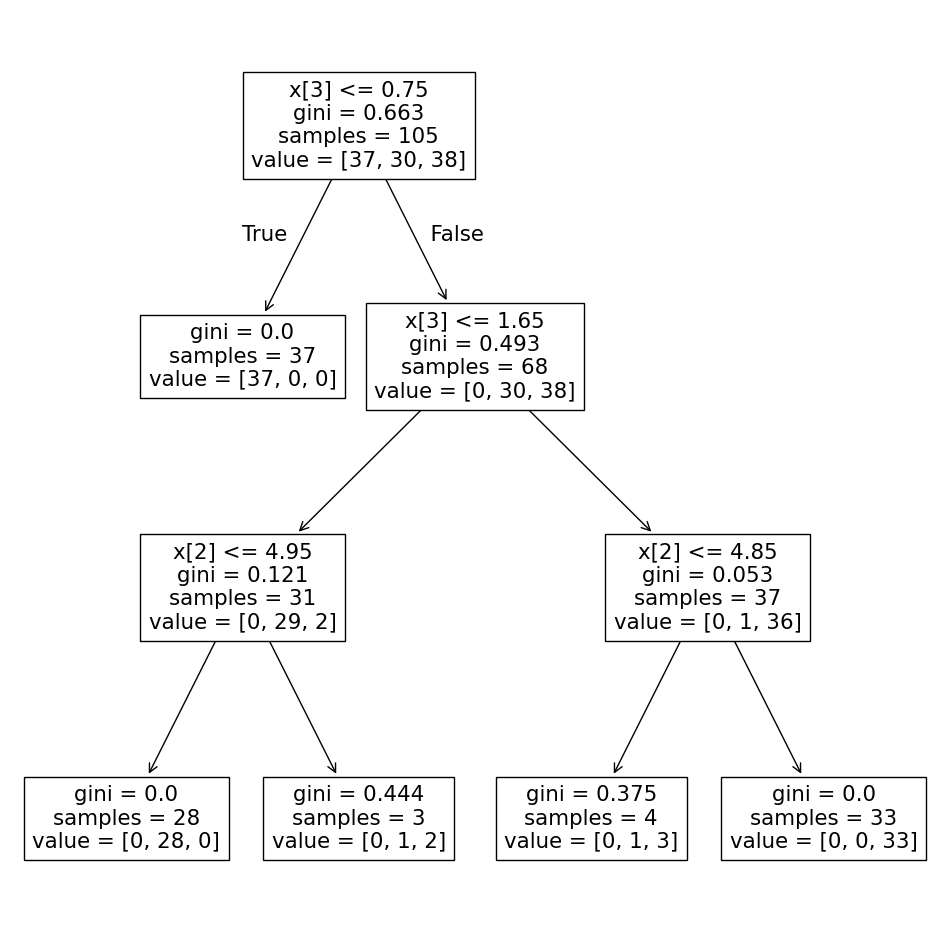

In [33]:
fig_maxdepth_3 = evaluate(max_depth=3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.90      0.93        21
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



[[13  0  0]
 [ 0 19  2]
 [ 0  1 10]]


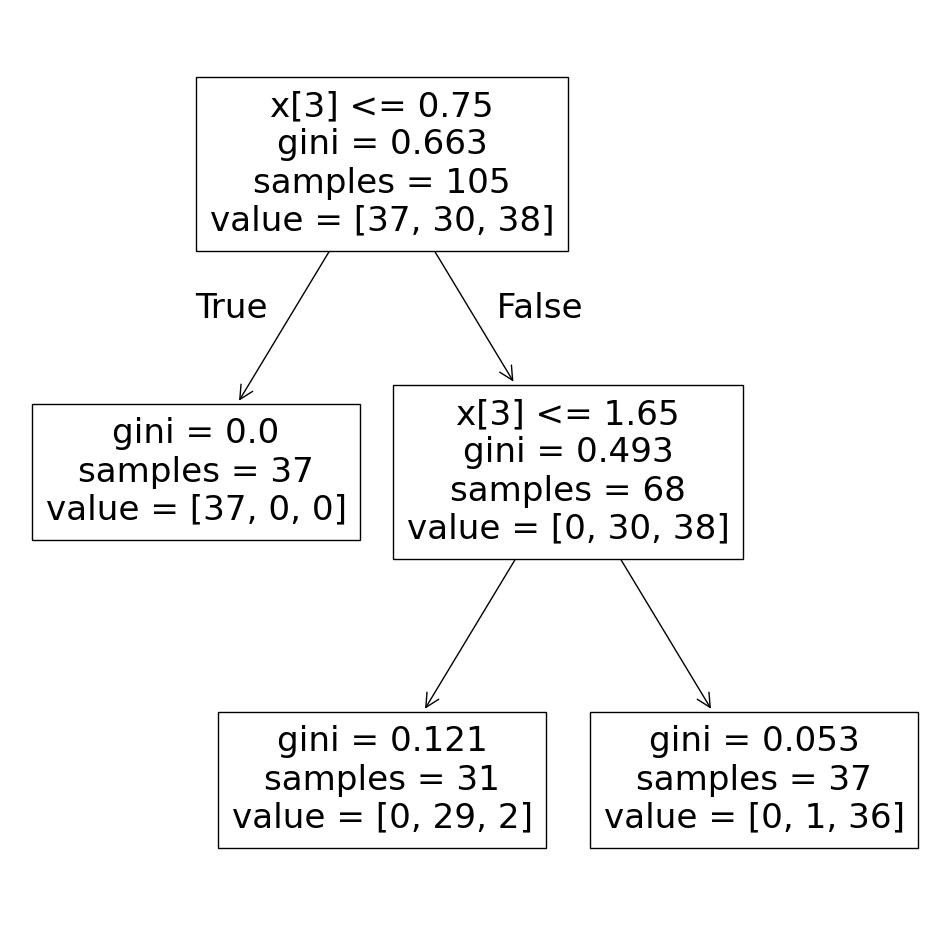

In [36]:
fig_maxdepth_2 = evaluate(max_depth=2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



[[13  0  0]
 [ 0 19  0]
 [ 0  1 12]]


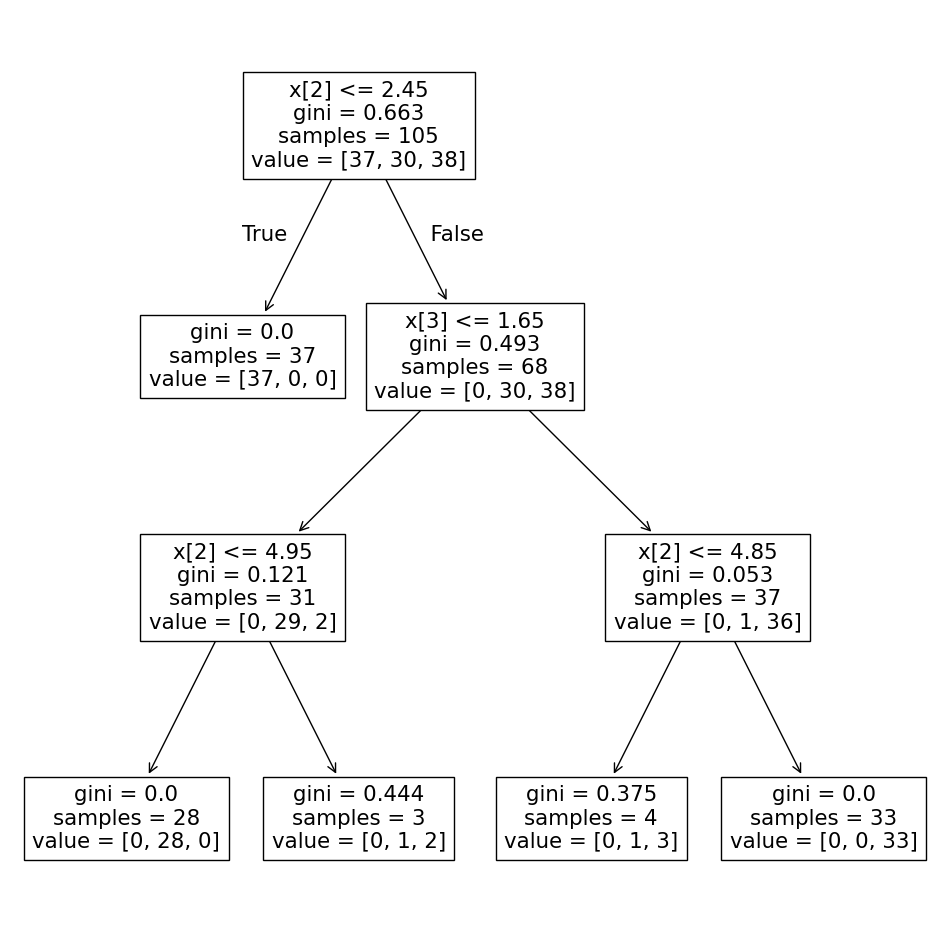

In [38]:
fig_maxdepth_3 = evaluate(max_depth=3)

### 4. Min Sample Split

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.90      0.93        21
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



[[13  0  0]
 [ 0 19  2]
 [ 0  1 10]]


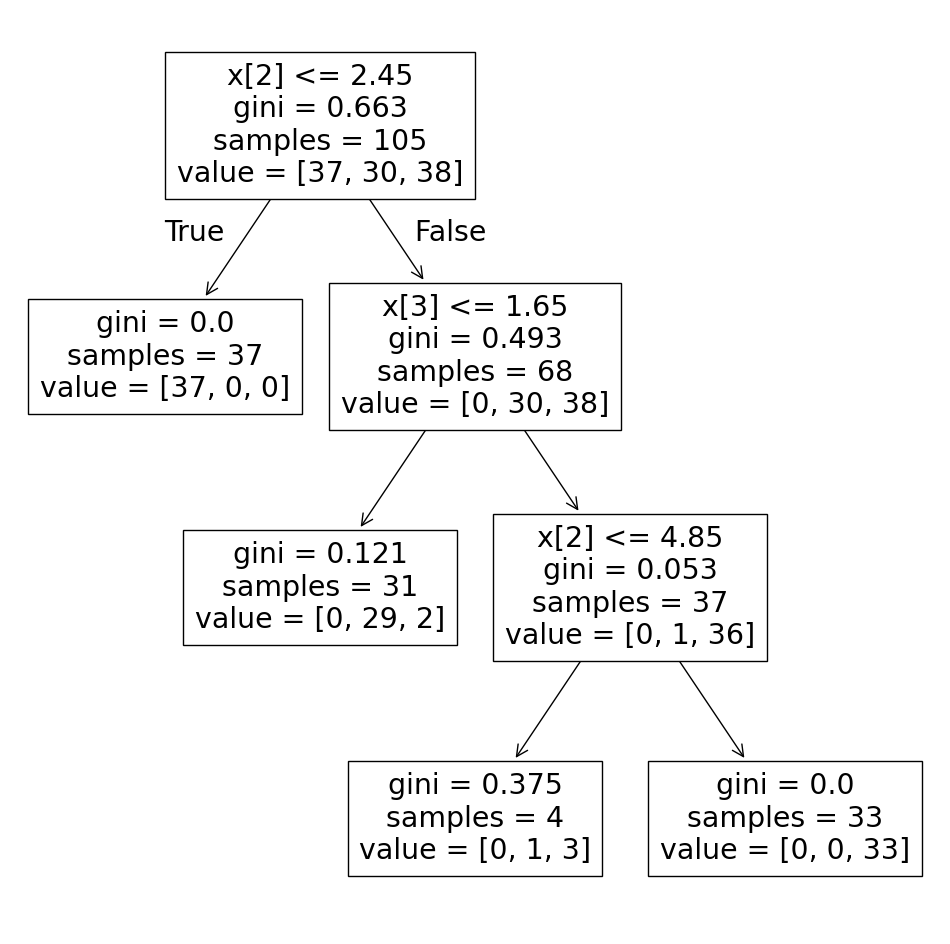

In [41]:
fig_minSampleSplit = evaluate(min_samples_split=35)

### 5. Min Samples Leaf

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.90      0.93        21
           2       0.83      0.91      0.87        11

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



[[13  0  0]
 [ 0 19  2]
 [ 0  1 10]]


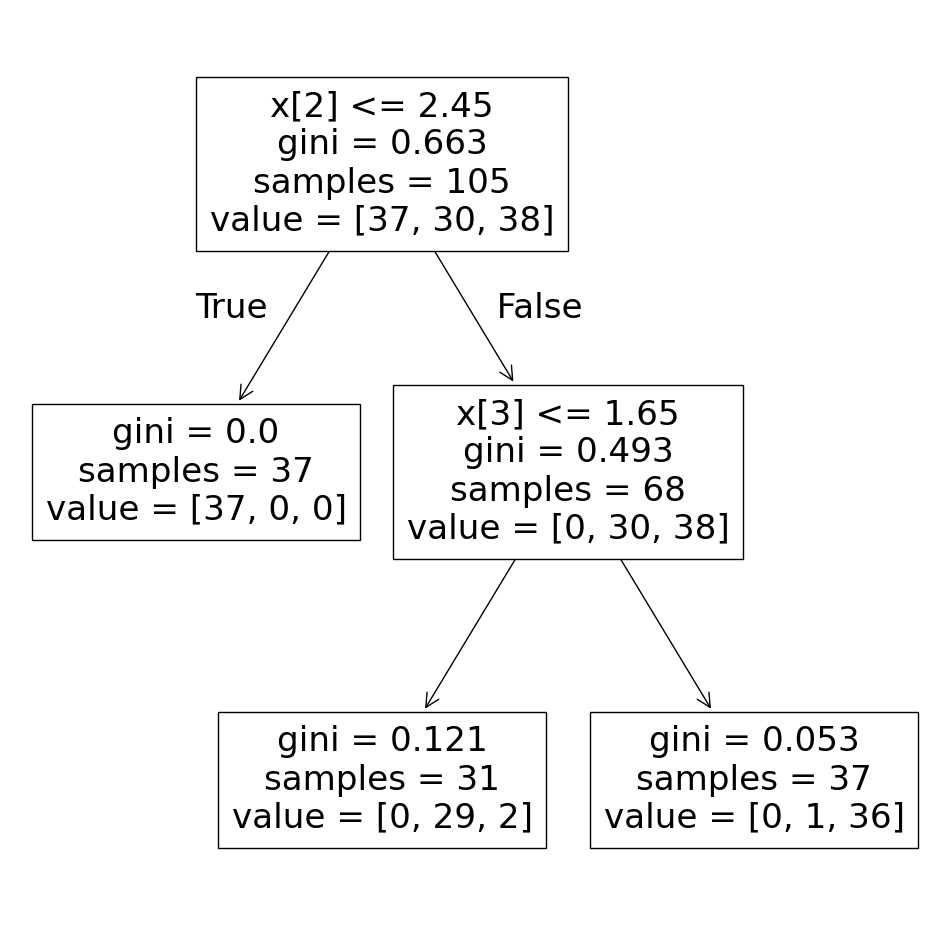

In [43]:
fig_minSamplesLeaf = evaluate(min_samples_leaf=30)

### 6. max_features

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      0.95      0.95        20
           2       0.92      0.92      0.92        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]


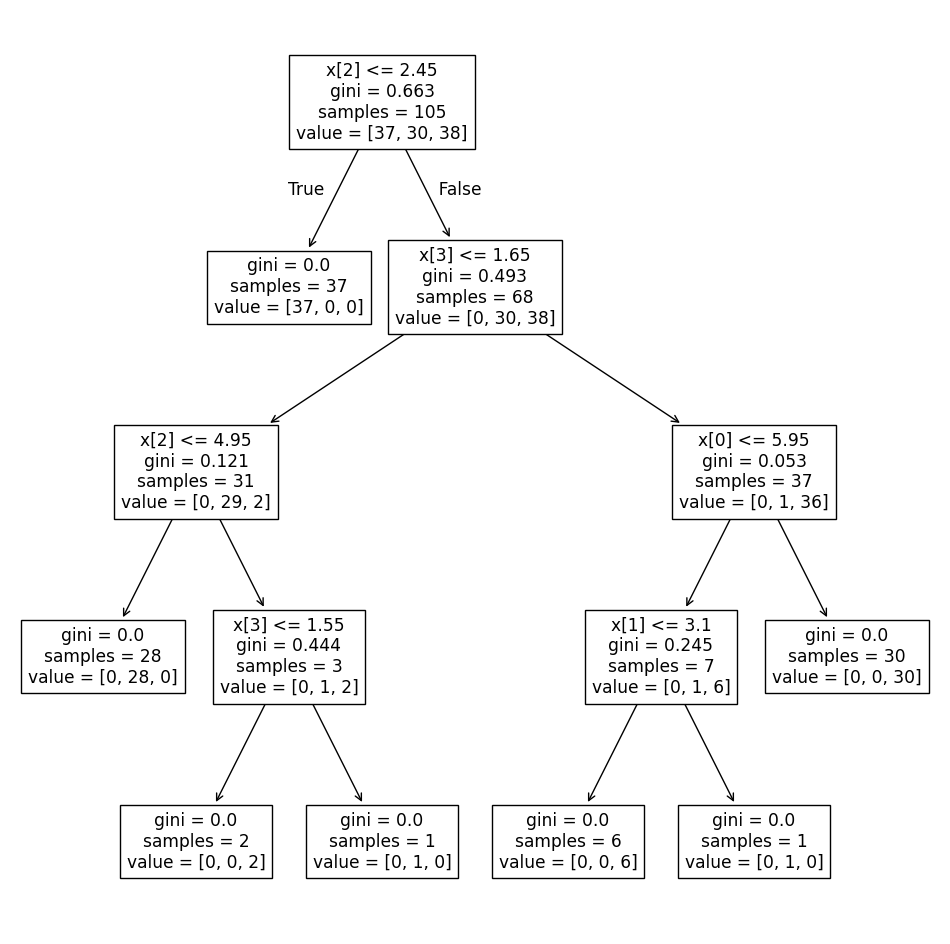

In [45]:
fig_maxFeatures = evaluate(max_features=3)

### 7. Max Leaf Nodes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



[[13  0  0]
 [ 0 19  0]
 [ 0  1 12]]


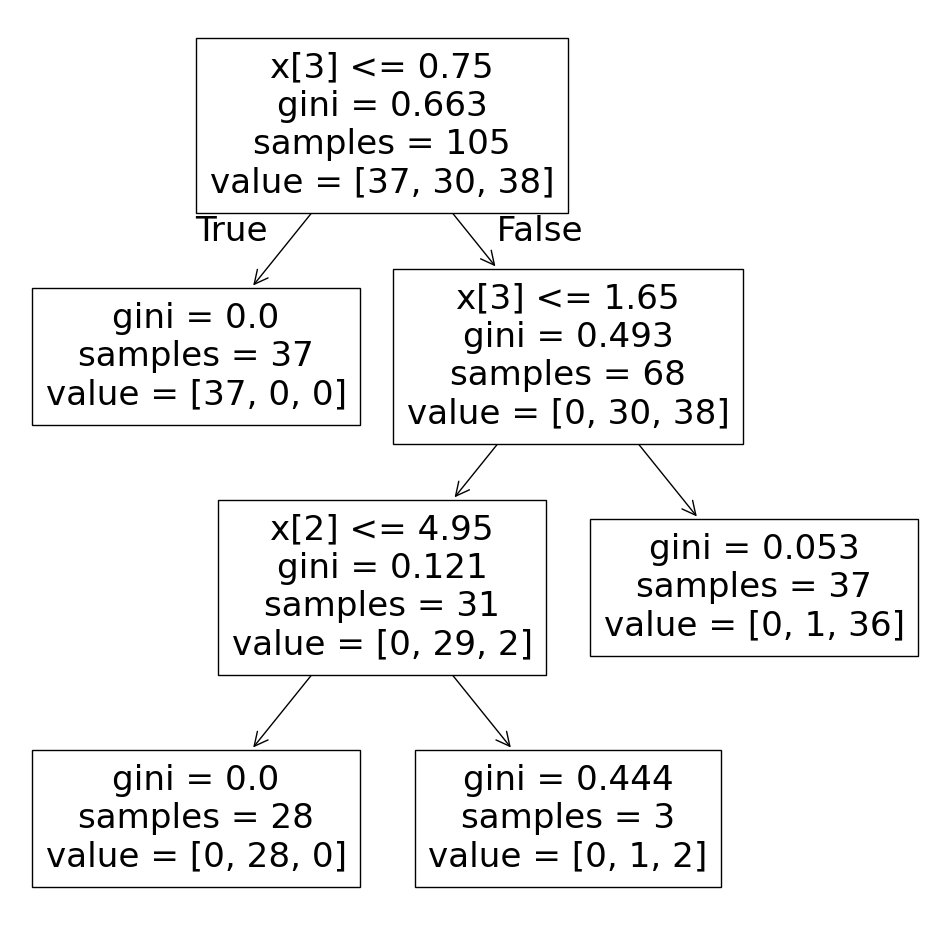

In [47]:
fig_maxLeafNodes = evaluate(max_leaf_nodes=4)

### 8. Min Impurity decrease

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.95      1.00      0.97        19
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



[[13  0  0]
 [ 0 19  0]
 [ 0  1 12]]


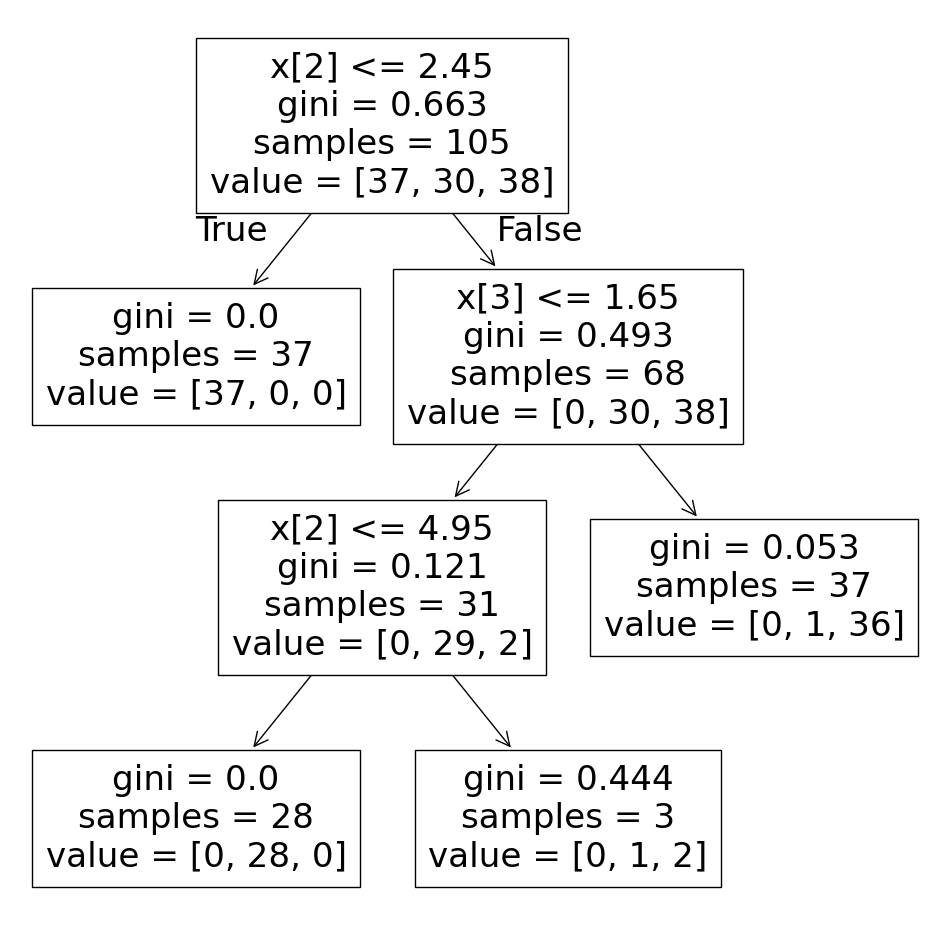

In [51]:
fig_min_impurity = evaluate(min_impurity_decrease=0.02)